### Simulating From the Null Hypothesis

Load in the data below, and use the exercises to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by clicking on the orange jupyter icon in the top left!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

- null : the average height for coffee drinkers is the same as for non-coffee drinkers
- alternative : the average height for coffee drinkers is NOT the same as for non-coffee drinkers    

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

- null : the average height for coffee drinkers is the same or greater than non-coffee drinkers.    
- alternative : the average height for coffee drinkers is less than non-coffee drinkers.  

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [2]:
bootsamp = sample_data.sample(200, replace=True)

means_coff = []  # mean height for coffee drinkers
means_nocoff = [] # mean height for non-coffee drinkers
diff_means = [] # difference in means 

In [3]:
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    mean_coff = bootsamp[bootsamp['drinks_coffee']==True]["height"].mean() 
    mean_nocoff = bootsamp[bootsamp["drinks_coffee"]==False]["height"].mean() 
    diff_mean = mean_coff - mean_nocoff
    means_coff.append(mean_coff)
    means_nocoff.append(mean_nocoff)
    diff_means.append(diff_mean)

(array([    5.,    64.,   391.,  1270.,  2509.,  2829.,  1976.,   797.,
          147.,    12.]),
 array([ 67.16067591,  67.34270013,  67.52472435,  67.70674857,
         67.88877278,  68.070797  ,  68.25282122,  68.43484543,
         68.61686965,  68.79889387,  68.98091809]),
 <a list of 10 Patch objects>)

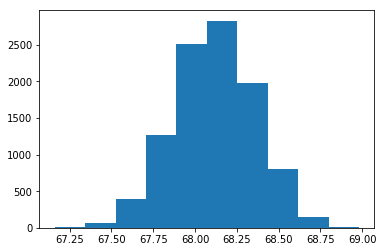

In [4]:
# mean height for coffee drinkers
plt.hist(means_coff)

In [7]:
# standard deviation for the mean of those who drink coffee
np.std(means_coff)

0.2407402135644629

(array([   16.,   106.,   590.,  1831.,  2989.,  2644.,  1352.,   377.,
           86.,     9.]),
 array([ 65.24631713,  65.56293231,  65.8795475 ,  66.19616268,
         66.51277787,  66.82939305,  67.14600823,  67.46262342,
         67.7792386 ,  68.09585379,  68.41246897]),
 <a list of 10 Patch objects>)

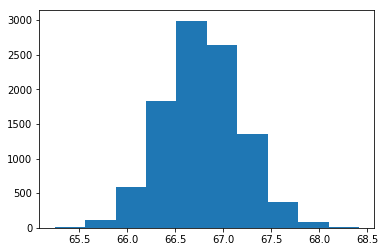

In [5]:
# mean height for non-coffee drinkers
plt.hist(means_nocoff)

In [8]:
# standard deviation for the mean of those who do not drink coffee
np.std(means_nocoff)

0.40510128379536048

(array([   24.,   109.,   546.,  1516.,  2623.,  2826.,  1664.,   568.,
          106.,    18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <a list of 10 Patch objects>)

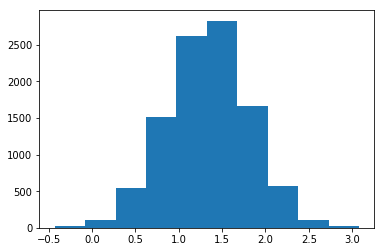

In [6]:
# difference in means
plt.hist(diff_means)

In [10]:
# standard deviation for the difference in means of those who drink coffee and those who do not. 
np.std(diff_means)

0.46978174056315813

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

** We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.**

In [11]:
null_vals = np.random.normal(0, np.std(diff_means), 10000) # Here are 10000 draws from the sampling distribution under the null

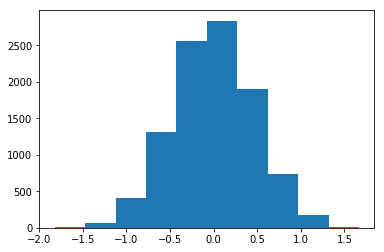

In [12]:
plt.hist(null_vals); #Here is the sampling distribution of the difference under the null

In [13]:
np.std(null_vals)

0.46574222900649859